## Author : Lorenzo Ausilio

# <u>Liquid Time Constant networks</u>

**This network wasn't built from scratch. It is a based upon an already existing class of recurrent neural networks called continous-time NNs.**

- <u>__Neural ODEs__</u> : $\boxed{\frac{dx(t)}{dt} = f(x(t),I(t),t,\theta)}$
    - hidden state is defined by solution to this equation
    - solution computed using a numerical ODE solver (e.g. Euler Method)
- <u>__Continuous time-RNN:__</u> $\boxed{\frac{dx(t)}{dt} = -\frac{x(t)}{\tau_{sys}} + f(x(t),I(t),t,\theta)}$
    - where $-\frac{x(t)}{\tau_{sys}}$ assists the system in reaching an equilibrium state with a __*time constant*__ $\tau$
    - $\tau_{sys}$ is fixed here
- <u>__Liquid Time-Constant RNN__</u> : $\boxed{\frac{dx}{dt} = - (\frac{1}{\tau} + f(x(t),I(t),t,\theta)) x(t) + Af(x(t),I(t),t,\theta)}$
    - this is the liquid equation 

<div class="alert alert-block alert-info">
<b>Note:</b> $\boxed{\theta = \{ W_i,b \} }$  are the weights and biases
</div>

__Where did the idea for this new class of neural networks come from?__ <br>
__There are 2 main reasons:__
1. LTC model is inspired from the computational model of neural dynamics in small species : This feature is inspired by the communication principles in the nervous system of small species.
2.  We propose a new CTRNN model, inspired by the nervous system dynamics of small species, such as Ascaris (Davis and Stretton 1989), Leech (Lockery and Sejnowski 1992), and C. elegans (Wicks, Roehrig, and Rankin 1996; Hasani et al. 2017a), in which synapses are nonlinear sigmoidal functions that model the biophysics of synaptic interactions


## INTRO SLIDES (inspired from Ramin video)
#### 1. What is a CT-RNN:
- it's in the class of continuous time NNs
- what is a time-continous NN?
    - it is determined by flow of hidden states
    - the flow of these hidden states is identified by a neural network $f$ with 3 parameters : number of layers $n$, width $k$ and type of activation function $l_{type}$ where width is maximum number of nodes in one layer
    - the equation for time-continous NN is $$\frac{dx}{dt} = f_{(n,k,l_{type})}(x(t),I(t),\theta)$$
        - where $x(t)$ = hidden states, $I(t)$ = inputs and $\theta$ = model parameters
    - this can give rise to dynamical systems
    - "it was recently shown that they can be the continous depth equivalent of a residual network" $\rightarrow$ **see paper about neural ODEs**
    - in a residual NN we have a "finite transformation of computation graphs which is equidistant" $\rightarrow$ **here again this is visible on the paper figure**. Basically what happens in these networks is that at each layer we compute an output whereas when we use a time-continous NN we can have adaptive computations : "transform the space into a vector field where you can have efficient computation at arbitrary points based on the type of numerical ODE solver that we use" $\rightarrow$ basically the network can compute an output now which is not limited by the number of layers, because instead for a residual network if u have 5 layers you will only be able to have an output at 5 "points"
    - $\rightarrow$ **see figure below**

<img src="./ODE_NNvsResidual_NN.png" width="250" height="250" align="center"/>

**Still on time-continuous RNN:** <br>
<img src="./3_RNNs.png" width="300" height="300" >

- <u> Standard RNN </u> : discretized version of continuous flow (1982)
    - the equation defines the transformation of a RNN
- <u>  Neural ODE </u> = time continuous network the representation becomes a differential equation 
- <u> CT-RNN </u> is a more stable version of the before network because of the dampening factor $\tau$ 

<img src="./differenceRNN_CTRNN.png" width="250" height="250" align="center"/>

**We can see that the transformation is much smoother for the CT-RNN case.** <br>
This is one of the benefits, among others, that we can get out of these systems.


#### 2. CT-RNN : How to implement them
Given a RNN where the hidden state equation is defined by $$\frac{dx(t)}{dt} = f(x(t),t,\theta)$$
We can use Numerical ODE solvers to approximate the above equation to:
$$\frac{dx(t)}{dt} \approx \frac{x(t+\delta t) - x(t)}{\delta t} \approx f(x(t),t,\theta)$$ $$\Leftrightarrow \boxed{x(t+\delta t) = x(t) + \delta t f(x(t),t,\theta)} $$ <br> where $\delta t$ is the time step and it's a parameter which can be altered. This method for solving ODEs is known as the **explicit Euler method**. And the computation of $x(t+\delta t)$ in the above equation is called a **Forward-pass** which computes the next hidden state given the current one $x(t)$ and the current inputs to the system $f(x(t),t,\theta)$. <br>
**The Forward-pass complexity is identified completely by the choice of the ODE solver** $\rightarrow$ which means that how complex the computation of the next hidden state is, is defined by which ODE solver we choose.

#### 2. How to train them
- Can use the __adjoint sensitivity method__ :
    - it is mentioned in the Neural ODE paper 
    - first you solve the ODE forward from $t_0$ to $t_1$ and then set up a new differential equation which when solved backwards from $t_1$ to $t_0$ will give us the derivatives of the loss function $L$ w.r.t. $\theta$
    - in practice : at every given point in time we are able to compute a loss which is computed by a call to an ODE solver
    - But we don't really use it in our network
- We use the __classical BPTT__ (Back Propagation Through Time)
    - we compute loss gradients through the ODE solver
    - computing the loss gradients one by one and then using the chain rule to compute our gradients. Then we update our old parameters with new one's using $\theta_{new} \leftarrow \theta_{old} + \gamma d\theta$

- <img src="./BPTT.png" width="350" height="350" align="center"/>

- __Comparison between BPTT and Adjoint sensitivity method :__
 - The reason why we use BPTT is because the adjoint sensitivity method can lead to errors, whereas BPTT, although it is more computationally expensive, is more accurate :

- <img src="./BPTTvsAdjoint.png" width="350" height="350" align="center"/>

#### 3. Can a neural ODE be as expressive as state of the art RNNs?
- With this motivation they give rise to a new category of NNs where their hidden state is computed by a linear ODE with a dampening factor :
   $$\boxed{\frac{dx(t)}{dt} = -\frac{x(t)}{\tau} + S(t)}$$
   where $$S(t) = f(x(t),I(t),t,\theta)(A-x(t))$$
   and $A$ is a biasing parameter. <br>
   which leads to the <u> __liquid equation__ </u> : $$\boxed{\frac{dx}{dt} = - (\frac{1}{\tau} + f(x(t),I(t),t,\theta)) x(t) + Af(x(t),I(t),t,\theta)}$$
   where $$\frac{1}{\tau_{sys}} = \frac{1}{\tau} + f(x(t),I(t),t,\theta) \Leftrightarrow \boxed{\tau_{sys} = \frac{\tau}{1+\tau f(x(t),I(t),t,\theta)}} $$ which is <u>time-dependent</u> and gives name to the "liquid" in Liquid-RNN. 

#### 4. About stability
- It has been shown that this varying time constant $\tau_{sys}$ is bounded by (<u>*Theorem 1.*</u> in Hasani's paper) : <br>
 *For a neuron $i$ within an LTC network, the liquid time constant is bounded by :*
$$\boxed{\frac{\tau_i}{1+ \tau_i W_i} \le \tau_{sys_i} \le \tau_i} $$
- Not only the time-constant $\tau_{sys}$ is bounded but also the hidden state $x_i (t)$ of a neuron is (<u>*Theorem 2.*</u>) : <br>
$$\boxed{min(0,A_i^{min}) \le x_i (t) \le max(0,A_i^{max})}$$
$\rightarrow$ <u>Conclusion</u> : LTCs are stable dynamical systems

#### 5. What can we do with LTCs in real world?
- Application to autonomous driving:
    - we can use LTCs at the last layer instead of using other networks and with just 19 neurons, this NN named NCP (Neural Circuit Policies) can successfully outperform all the other models
- ...
---

## SLIDE(S) ABOUT SS & DSSP :
## On Secondary structure prediction & DSSP
### Secondary structure
- Secondary structure constitues the link between primary and tertiary structure
- 3D structures are usually determined experimentally using X-ray cristallograhy, cryo-electron microscopy or NMR spectroscopy
- These experiments are however time consuming and expensive, which is also why there is a large gap between the number of protein structures in PDB (+/-150.000) and that of sequences stored in databases like UniProtKB/TrEMBL (+/-140.000.000)
- this is why we resort to computational methods for finding the 2D structure from the 1D one
### DSSP
- The labels that we use for training our LTC-based Neural Network come from the DSSP, which stands for **D**ictionary of **S**econdary **S**tructure of **P**roteins
- to avoid confusion it's important to mention that the DSSP can be looked at in 2 ways : 
    1. A database of secondary structure assignment for all protein entries in the Protein Data Bank
    2. It is also the name of the program that calculates the 2D structure from the 3D one
- How do they get the 2D structure from the 3D one :
    - Done directly by calculating the hydrogen bond energy between all atoms which allows us to get the torsional angles $\phi$ and $\psi$ of amino acids
    - from these patterns they can assign each residue to 8 different secondary structures

__Graphically it can look smth like this:__

In [1]:
from IPython. display import HTML 

HTML('<img src="./animated_Phi_and_Psi_Angles.gif">')

---

## About visualizing the grid search results :

In [2]:
# importing the data 
import pandas as pd

df = pd.read_csv(r'\Users\loren\Downloads\LCPB_protein\gridsearch_1.csv')

# renaming the columns because otherwise there was a problem selecting them
df.columns = ["model","size","lr","opt","activation","best_epoch","train_loss","train_accuracy","valid_loss","valid_accuracy",
              "test_loss","test_accuracy"]
df

,model,size,lr,opt,activation,best_epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,test_loss,test_accuracy
0,ltc,32,0.001,Adam,sigmoid,14,0.57905388,0.443914,0.55677801,4.413254e-01,0.57319021,4.509359e-01
1,ltc,32,0.001,Adam,tanh,1,1.38371336,-0.424360,1.31859767,2.000000e-08,1.32401979,2.000000e-08
2,ltc,32,0.001,Adam,relu,14,1.10778999,0.203926,1.09809995,2.072811e-01,1.08953333,2.146586e-01
3,ltc,32,0.001,Adagrad,sigmoid,6,1.38779211,-0.577312,1.38144219,1.470540e-01,1.38485801,1.452676e-01
4,ltc,32,0.001,Adagrad,tanh,8,1.36086452,-0.672312,1.35740173,2.162703e-01,1.3580426,2.186660e-01
...,...,...,...,...,...,...,...,...,...,...,...,...
85,ltc,32,0.500,GD,tanh,1,1.2655158,-0.057898,1.21584809,2.000000e-08,1.23026562,2.000000e-08
86,ltc,32,0.500,GD,relu,13,1.31433284,0.102486,1.29063797,1.477894e-01,1.29890609,1.479831e-01
87,ltc,32,0.500,Adadelta,sigmoid,1,1.38303769,-0.662136,1.36066556,9.851276e-02,1.36444247,9.512263e-02
88,ltc,32,0.500,Adadelta,tanh,1,1.32449687,0.008786,1.31230438,6.660070e-03,1.31713784,6.222030e-03


In [3]:
max_index_test = df[["test_accuracy"]].idxmax()
max_index_test

test_accuracy    45
dtype: int64

In [4]:
# model with the best test accuracy
max_test = df.iloc[45]
max_test = pd.DataFrame(max_test)
max_test

,45
model,ltc
size,32
lr,0.05
opt,Adam
activation,sigmoid
best_epoch,13
train_loss,0.49047887
train_accuracy,0.519626
valid_loss,0.47453752
valid_accuracy,0.520838


__The best test accuracy achieved by us before trying the grid search was around 57% with Adam with 30 epochs (but the accuracy was stuck at 57% after already 20 epochs), sigmoid act func and lr = 0.01. With the gridsearch and these same parameters the accuracy was 51.16% after only 13 epochs.<br>
So technically since we got a best accuracy with gridsearch by only changing the lr being 0.05 at 51.96%, it would be fruitful to run our liquid network with <u>*Sigmoid,Adam and lr = 0.05*</u> as it seems to be the best one according to grid search.__

In [5]:
# lets remove the cases where learning has failed, i.e. where best epoch = 1 and also where the test accuracy was negative
good_learning_df = df[ (df.best_epoch != 1) & (df.test_accuracy >=0)]

In [6]:
# lets trim the og gridsearch dataframe to keep only what we want to show : lr, optimizer, activation func and test accuracy
good_learning_df = good_learning_df.drop(['model', 'size',"best_epoch","train_loss","train_accuracy","valid_loss",
                                          "valid_accuracy","test_loss"], axis=1)

In [7]:
# trimmed df
good_learning_df.head()

,lr,opt,activation,test_accuracy
0,0.001,Adam,sigmoid,0.450936
2,0.001,Adam,relu,0.214659
3,0.001,Adagrad,sigmoid,0.145268
4,0.001,Adagrad,tanh,0.218666
6,0.001,RMSProp,sigmoid,0.195017


In [8]:
%matplotlib notebook

**Trying a 3D heat map**

In [9]:
# firstly we have to convert the optimizers to integers to be able to plot it : 
#for the optimizers 1 = Adam, 2 = Adagrad, 3 = RMSprop, 4 = GD and 5 = Adadelta
# for the activation funcs 1 = sigmoid, 2 = tanh and 3 = relu
# now we replace this in the dataframe df


| Adam | Adagrad | RMSProp | GD | Adadelta |
| --- | --- | --- | --- | --- |
| 1 | 2 | 3 | 4 | 5 |

| sigmoid | tanh | relu |
| --- | --- | --- |
| 1 | 2 | 3 |

In [10]:
good_learning_df["opt"].replace({"Adam": 1, "Adagrad": 2,"RMSProp" : 3, "GD" : 4, "Adadelta" : 5}, inplace=True)
good_learning_df["activation"].replace({"sigmoid": 1, "tanh": 2,"relu" : 3}, inplace=True)
good_learning_df.head()

,lr,opt,activation,test_accuracy
0,0.001,1,1,0.450936
2,0.001,1,3,0.214659
3,0.001,2,1,0.145268
4,0.001,2,2,0.218666
6,0.001,3,1,0.195017


In [11]:
df = good_learning_df

In [12]:
df.head()

,lr,opt,activation,test_accuracy
0,0.001,1,1,0.450936
2,0.001,1,3,0.214659
3,0.001,2,1,0.145268
4,0.001,2,2,0.218666
6,0.001,3,1,0.195017


<IPython.core.display.Javascript object>


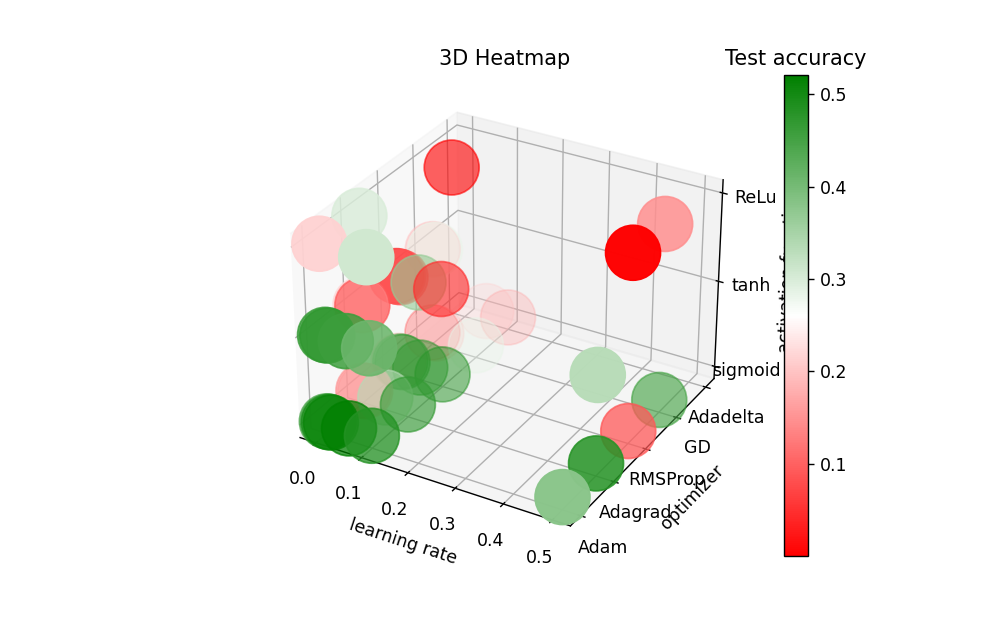

In [13]:
#!/usr/bin/python3
# 3D Heatmap in Python using matplotlib

# to make plot interactive
%matplotlib notebook

# importing required libraries
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pylab import *
from  matplotlib.colors import LinearSegmentedColormap
cmap=LinearSegmentedColormap.from_list('rg',["r", "white", "g"], N=256)

# reading a dummy dataset
#df = pd.read_csv(r'\Users\loren\Downloads\LCPB_protein\gridsearch_1.csv')

x = df["lr"].tolist()
y = [float(el) for el in df["opt"].tolist()]
z = [float(el) for el in df["activation"].tolist()]

colo = df["test_accuracy"].tolist()

# creating 3d figures
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111, projection='3d')

# configuring colorbar
color_map = cm.ScalarMappable(cmap=cmap)
color_map.set_array(colo)

# creating the heatmap
img = ax.scatter(x, y, z, marker='o', s=1000, c = df.test_accuracy, cmap = cmap)
cbar = plt.colorbar(color_map)
cbar.ax.set_title('Test accuracy')

# adding title and labels
ax.set_title("3D Heatmap")
ax.set_xlabel('learning rate')
ax.set_ylabel('optimizer')
ax.set_zlabel('activation function')

# for the y axis (the optimizers)
l = [1,2,3,4,5]
y = ["Adam","Adagrad","RMSProp","GD","Adadelta"]
ax.set_yticks(l)
ax.set_yticklabels(y)

# for the z axis (the activation function)
ll = [1,2,3]
z = ["sigmoid","tanh","ReLu"]
ax.set_zticks(ll)
ax.set_zticklabels(z)

# displaying plot
plt.show()

### 2D heat map for train,valid,accuracy depending on protein a.a. max length :

AA_MAX TRAIN VAL TEST
250 0.5641 0.5759 0.5677
400 0.5576 0.5109 0.5189
500 0.5649 0.5967 0.5179

## Another 3D grid search visualization O.O

In [14]:
dff = pd.read_csv(r"\Users\loren\Downloads\LCPB_protein\nni_gridsearch_new.csv")
dff.head()

,model,size,lr,opt,activation,nni,window,seq_len,hydro,k,best_epoch,train_loss,train_accuracy,train_std,valid_loss,valid_accuracy,val_std,test_loss,test_accuracy,test_std
0,ltc,32,0.05,Adam,sigmoid,None,1,1,0,0.2,1,1.054451,0.455200,0.000996,1.066442,0.448363,0.024960,0.975866,0.484848,0.025114
1,ltc,32,0.05,Adam,sigmoid,exp,3,1,0,0.2,4,0.956204,0.532063,0.001006,0.983642,0.521739,0.025262,0.858933,0.590206,0.024967
2,ltc,32,0.05,Adam,sigmoid,exp,3,1,0,0.4,4,0.952956,0.532950,0.001006,0.993292,0.526854,0.025250,0.833959,0.615979,0.024691
3,ltc,32,0.05,Adam,sigmoid,exp,3,1,0,0.6,3,0.951882,0.536038,0.001006,1.016894,0.526854,0.025250,0.837272,0.613402,0.024722
4,ltc,32,0.05,Adam,sigmoid,exp,3,1,0,0.8,4,0.970904,0.524081,0.001007,1.010687,0.521739,0.025262,0.865243,0.597938,0.024892


George made the first one up : 
- **<u>NNI</u> = neigbour-to-neighbour interaction : it keeps track of the different interactions that a.a. have with each other** <br>
- **<u>Window size</u> = how many a.a. are considered before making a prediction of SS** <br>
- **<u>k</u> is the parameter to keep track of how strong the interaction is**

In [15]:
# Let's remove the first row where nni == "None"
dff = dff[ (dff.nni != "None")]
dff.head()

,model,size,lr,opt,activation,nni,window,seq_len,hydro,k,best_epoch,train_loss,train_accuracy,train_std,valid_loss,valid_accuracy,val_std,test_loss,test_accuracy,test_std
1,ltc,32,0.05,Adam,sigmoid,exp,3,1,0,0.2,4,0.956204,0.532063,0.001006,0.983642,0.521739,0.025262,0.858933,0.590206,0.024967
2,ltc,32,0.05,Adam,sigmoid,exp,3,1,0,0.4,4,0.952956,0.532950,0.001006,0.993292,0.526854,0.025250,0.833959,0.615979,0.024691
3,ltc,32,0.05,Adam,sigmoid,exp,3,1,0,0.6,3,0.951882,0.536038,0.001006,1.016894,0.526854,0.025250,0.837272,0.613402,0.024722
4,ltc,32,0.05,Adam,sigmoid,exp,3,1,0,0.8,4,0.970904,0.524081,0.001007,1.010687,0.521739,0.025262,0.865243,0.597938,0.024892
5,ltc,32,0.05,Adam,sigmoid,inv,3,1,0,0.2,1,0.974068,0.521136,0.001008,1.031433,0.516624,0.025272,0.839384,0.608247,0.024782


In [16]:
# max test accuracy was achieved here
max_index_test = dff[["test_accuracy"]].idxmax()
max_index_test

test_accuracy    53
dtype: int64

__Model with best accuracy :__ 

In [17]:
# model with the best test accuracy
# had to put 52 because I dropped the first row so now counting starts from 1, e.g. 0th row has index 1, 1st has index 2,...
max_test = dff.iloc[52]
max_test = pd.DataFrame(max_test)
max_test

,53
model,ltc
size,32
lr,0.05
opt,Adam
activation,sigmoid
nni,inv
window,9
seq_len,1
hydro,0
k,0.2


**So the best accuracy is 65.93% and it was achieved by having <u>nni = inv</u>, <u>window = 9</u>, and <u>k = 0.2</u> while still keeping the same parameters for lr, activation and optimizer that were given as being the best one's from the gridsearch results of before.**

**These results were achieved with seq_len = 1 and hydro = 0.**

In [18]:
# Let's remove the useless columns
# lets trim the og gridsearch dataframe to keep only what we want to show : lr, optimizer, activation func and test accuracy
dff = dff.drop(['model', 'size',"lr","opt","activation","seq_len",
        "hydro","best_epoch","train_loss","train_std","train_accuracy","valid_loss","valid_accuracy","val_std","test_loss","test_std"], axis=1)

In [ ]:
dff = dff.drop(["train_accuracy"], axis = 1)

In [21]:
dff

,nni,window,k,test_accuracy
1,exp,3,0.2,0.590206
2,exp,3,0.4,0.615979
3,exp,3,0.6,0.613402
4,exp,3,0.8,0.597938
5,inv,3,0.2,0.608247
...,...,...,...,...
60,inv_sq,9,0.8,0.607143
61,linear,9,0.2,0.629121
62,linear,9,0.4,0.642857
63,linear,9,0.6,0.626374


#### For the 3D heat map we need to assign again some numbers to nni :
| exp | inv | inv_sq | linear |
| --- | --- | --- | --- |
| 1 | 2 | 3 | 4 |

In [22]:
dff["nni"].replace({"exp": 1, "inv": 2,"inv_sq" : 3, "linear" : 4}, inplace=True)
dff.head()

,nni,window,k,test_accuracy
1,1,3,0.2,0.590206
2,1,3,0.4,0.615979
3,1,3,0.6,0.613402
4,1,3,0.8,0.597938
5,2,3,0.2,0.608247


<IPython.core.display.Javascript object>


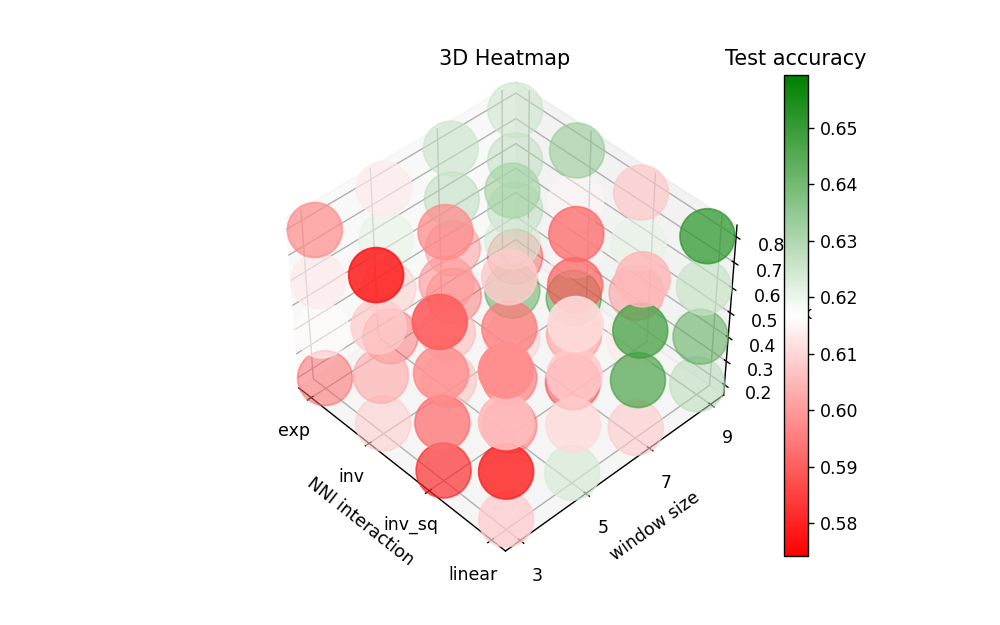

In [23]:
#!/usr/bin/python3
# 3D Heatmap in Python using matplotlib

# to make plot interactive
%matplotlib notebook

# importing required libraries
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pylab import *
from  matplotlib.colors import LinearSegmentedColormap
cmap=LinearSegmentedColormap.from_list('rg',["r", "white", "g"], N=256)

# reading a dummy dataset
#df = pd.read_csv(r'\Users\loren\Downloads\LCPB_protein\gridsearch_1.csv')

x = dff["nni"].tolist()
y = [float(el) for el in dff["window"].tolist()]
z = [float(el) for el in dff["k"].tolist()]

colo = dff["test_accuracy"].tolist()

# creating 3d figures
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111, projection='3d')

# configuring colorbar
color_map = cm.ScalarMappable(cmap=cmap)
color_map.set_array(colo)

# creating the heatmap
img = ax.scatter(x, y, z, marker='o', s=1000, c = dff.test_accuracy, cmap = cmap)
cbar = plt.colorbar(color_map)
cbar.ax.set_title('Test accuracy')

# adding title and labels
ax.set_title("3D Heatmap")
ax.set_xlabel('NNI interaction')
ax.set_ylabel('window size')
ax.set_zlabel('k')

# for the y axis (the window size)
l = [3,5,7,9]
y = ["3","5","7","9"]
ax.set_yticks(l)
ax.set_yticklabels(y)

# for the x axis (nni)
ll = [1,2,3,4]
x = ["exp","inv","inv_sq","linear"]
ax.set_xticks(ll)
ax.set_xticklabels(x)

# displaying plot
plt.show()

### For creating the protein files with proteins of diff lengths :

In [ ]:
import numpy as np
import csv
import json
with open("C:/Users/loren/Downloads/LCPB_protein/struct-seq.dat", "r") as f:
	reader = csv.reader(f, delimiter=",")
	new_prot = None
	prot_dict = []
	for row in reader:
		#counting number of proteins
		if row[0].startswith("#"):
			if new_prot is not None:
				if len(new_prot["aminoacids"]) < 500:
					prot_dict.append(new_prot)
			new_prot={'id': row[0], "labels" : [], "aminoacids" : [] }
		else:
			new_prot["labels"].append(row[0][2])
			new_prot["aminoacids"].append(row[0][0])
	g = open("C:/Users/loren/Downloads/LCPB_protein/struct-seq500.json", "w")
	g.write(json.dumps(prot_dict, indent=4))

## make 3 json files, one with proteins under 250, 400 and 500 a.a.

### For one of the 2D heat maps :

In [ ]:
import seaborn as sns
import statistics as stat
import pandas as pd
import matplotlib.pyplot as plt
# data to plot
""" thing to plot:
#AA_MAX TRAIN VAL TEST
250 0.5641 0.5759 0.5677
400 0.5576 0.5109 0.5189
500 0.5649 0.5967 0.5179"""

"""AA_size = [250]*3 + [400]*3 + [500]*3
Accuracies = [0.5641,0.5576,0.5649] + [0.5759,0.5109,0.5967] + [0.5677,0.5189,0,5179]
accuracies_scale"""

#AA_length == workers
AA_length = [250]*3 + [400]*3 + [500]*3
# Tr_Val_Te == cores
# Where train = 1, val = 2, test = 3
Tr_Val_Te = ["Train","Validation","Test"]*3
"""acc_values = [0.5641,0.5576,0.5649,
		  	  0.5759,0.5109,0.5967,
		      0.5677,0.5189,0.5179]"""

acc_values = [0.5641,0.5759,0.5677,
			 0.5576,0.5109, 0.5189,
			 0.5649,0.5967,0.5179]

sns.set(rc = {'figure.figsize':(10,6)},font_scale=2)
data = pd.DataFrame({'AA max length': AA_length, '': Tr_Val_Te, 'Accuracies': acc_values})
data_pivoted = data.pivot('AA max length', "", "Accuracies")
#cmap = sns.color_palette("coolwarm", as_cmap=True)
cmap = sns.diverging_palette(10, 150, s=100, l=60, n=10, as_cmap=True)
ax = sns.heatmap(data_pivoted, cmap=cmap, center=stat.mean(acc_values), annot=True,cbar_kws={'label': 'Accuracies'}, annot_kws={'size': 20})
for t in ax.texts: t.set_text(t.get_text() + "")
plt.show()
